<a href="https://colab.research.google.com/github/mizan-25/Deep_Learning_NN/blob/main/Character_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Character recognition using a simple neural network

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [ ]:
len(X_train),len(X_test)

(60000, 10000)

In [ ]:
X_train[0].shape

(28, 28)

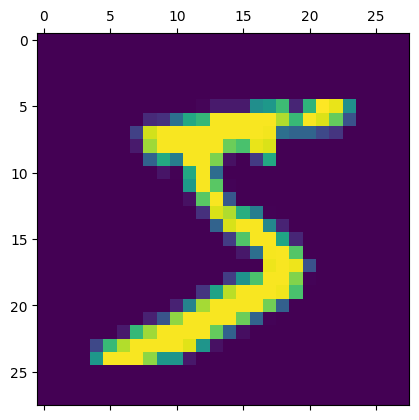

In [ ]:
plt.matshow(X_train[0])

In [ ]:

X_train=X_train/255
X_test=X_test/255

In [ ]:
X_train_flatten=X_train.reshape(len(X_train),28*28)
X_test_flatten=X_test.reshape(len(X_test),28*28)

X_train_flatten.shape

(60000, 784)

In [ ]:
X_test_flatten.shape

(10000, 784)

In [ ]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flatten,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4748 - accuracy: 0.8747
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3041 - accuracy: 0.9149
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2836 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2733 - accuracy: 0.9235
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2669 - accuracy: 0.9263


In [ ]:
model.evaluate(X_test_flatten,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2689 - accuracy: 0.9249


[0.2689276933670044, 0.9248999953269958]

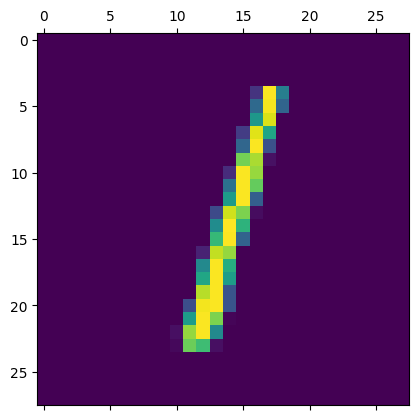

In [ ]:
plt.matshow(X_test[2])

In [ ]:
y_predict=model.predict(X_test_flatten)
y_predict[2]


313/313 [==============================] - 0s 1ms/step


array([3.2224567e-04, 9.9441367e-01, 6.6434884e-01, 2.8365579e-01,
       2.5918970e-02, 1.0142966e-01, 1.8211703e-01, 1.3438724e-01,
       4.2050824e-01, 4.9794674e-02], dtype=float32)

#OutPut

In [ ]:
np.argmax(y_predict[2])

1

In [ ]:
y_predict_labels=[np.argmax(i) for i in y_predict]
y_predict_labels[:5]

[7, 2, 1, 0, 4]

In [ ]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [ ]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predict_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    0,    2,    0,    4,    9,    2,    2,    0],
       [   0, 1111,    3,    2,    0,    1,    4,    2,   12,    0],
       [   9,    9,  926,   13,    9,    1,   14,    9,   39,    3],
       [   5,    0,   19,  915,    1,   22,    4,   11,   27,    6],
       [   1,    1,    2,    1,  921,    0,   13,    4,    9,   30],
       [  12,    2,    2,   38,   11,  752,   21,    6,   40,    8],
       [  10,    3,    4,    1,    7,    6,  923,    2,    2,    0],
       [   1,    5,   24,    5,    9,    1,    0,  943,    3,   37],
       [   8,    7,    6,   18,    9,   17,   10,    9,  883,    7],
       [  10,    7,    1,   10,   33,    4,    1,   21,    8,  914]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

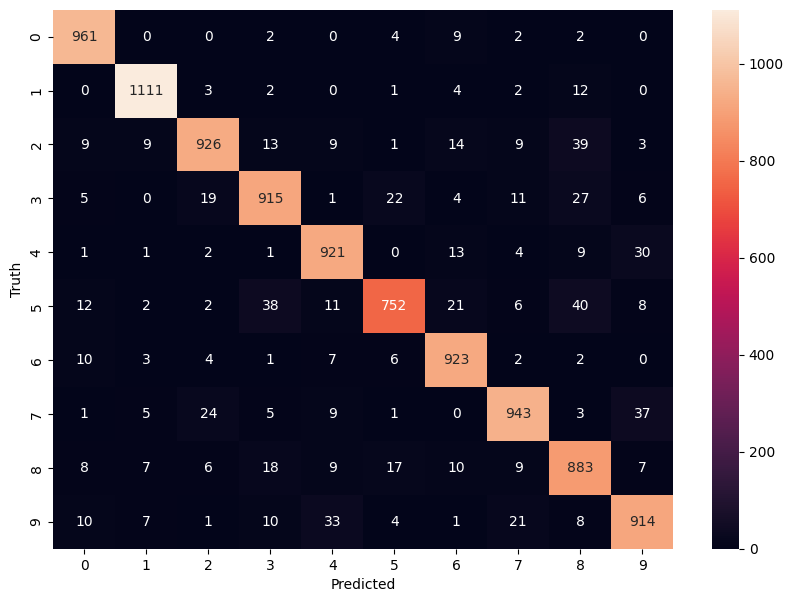

In [ ]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
